# Goal
With the  given information about a medical insurance company, create and train a Machine Learning model using Linear Regression that is able to predict the insurance cost of future patients given their input information

# Workflow
- Collect the insurance cost data
- Analyse the data
- Pre process the data
- Split the data into training data and test data
- Implement the model
- Train the model
- Create predictions

# Dataset
The dataset contains information such as the following:
- age: age of the primary beneficiary
- sex: insurance contractor gender
- bmi: body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: number of children covered by health insurance / number of dependents
- smoker: smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: individual medical costs billed by health insurance

### Importing Libraries

In [173]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Input the data

In [174]:
df = pd.read_csv('insurance.csv')

In [175]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Exploratory Data Analysis - Handling Duplicates

In [176]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (1, 7)


In [177]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [178]:
df = df.drop_duplicates()

### Exploratory Data Analysis - Uniqueness

In [179]:
# Loop through each column and count the number of distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

age: 47 distinct values
sex: 2 distinct values
bmi: 548 distinct values
children: 6 distinct values
smoker: 2 distinct values
region: 4 distinct values
charges: 1337 distinct values


### Exploratory Data Analysis - Find Missing Values

In [180]:
# Let's check for missing values
missing_values = df.isna()

In [181]:
missing_values.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337,1337,1337,1337,1337,1337,1337
unique,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False
freq,1337,1337,1337,1337,1337,1337,1337


### Exploratory Data Analysis - Describe the original data

In [182]:
df.describe().style.format("{:.2f}")

,age,bmi,children,charges
count,1337.00,1337.00,1337.00,1337.00
mean,39.22,30.66,1.10,13279.12
std,14.04,6.10,1.21,12110.36
min,18.00,15.96,0.00,1121.87
25%,27.00,26.29,0.00,4746.34
50%,39.00,30.40,1.00,9386.16
75%,51.00,34.70,2.00,16657.72
max,64.00,53.13,5.00,63770.43


### Univariate Analysis

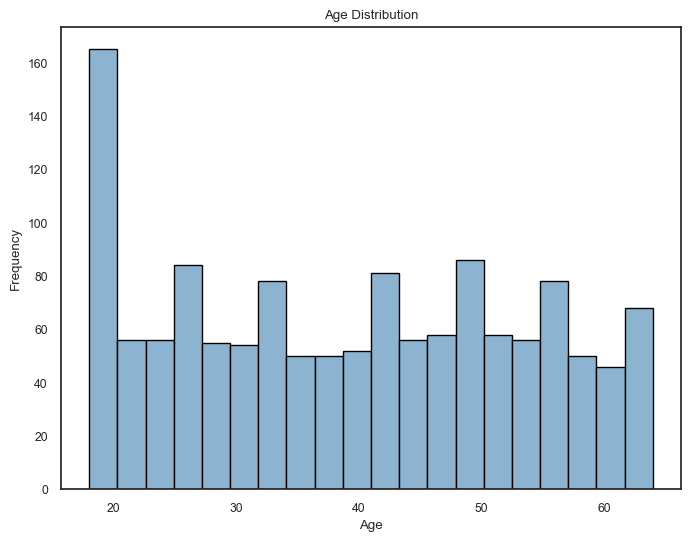

In [183]:
# Age distribution
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

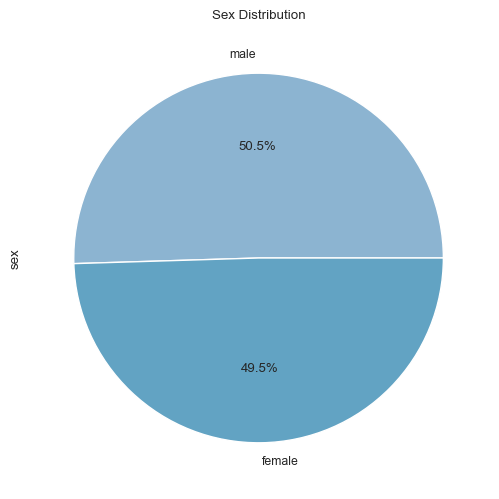

In [184]:
# Sex distribution
plt.figure(figsize=(8, 6))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

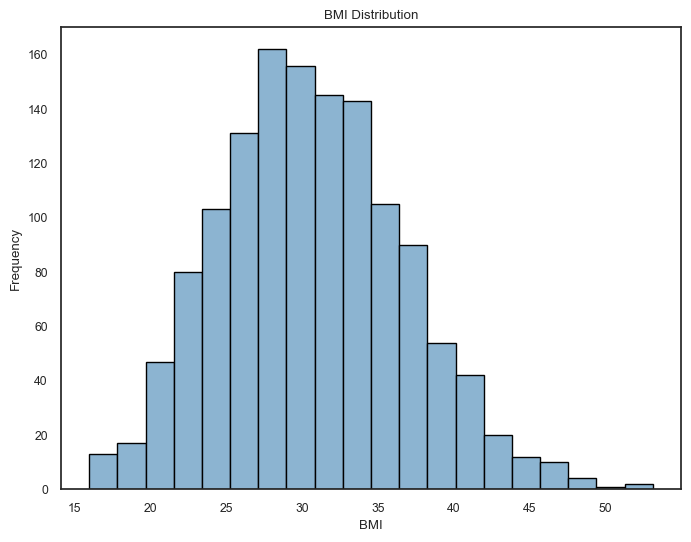

In [185]:
# BMI distribution
plt.figure(figsize=(8, 6))
plt.hist(df['bmi'], bins=20, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()

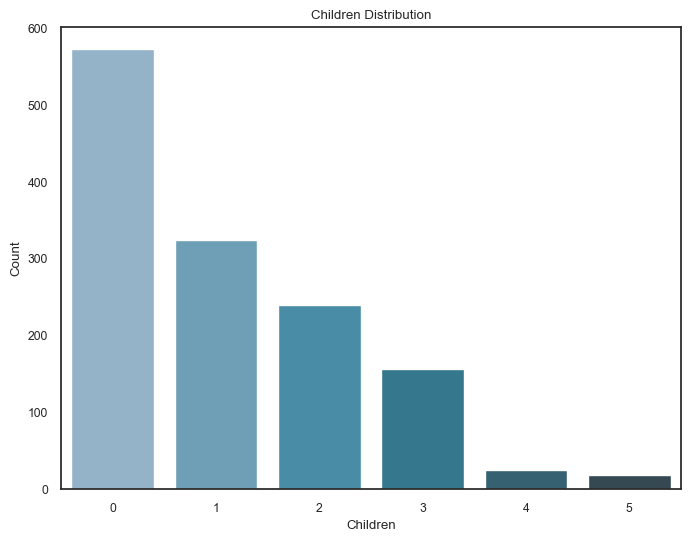

In [186]:
# Children distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='children')
plt.xlabel('Children')
plt.ylabel('Count')
plt.title('Children Distribution')
plt.show()

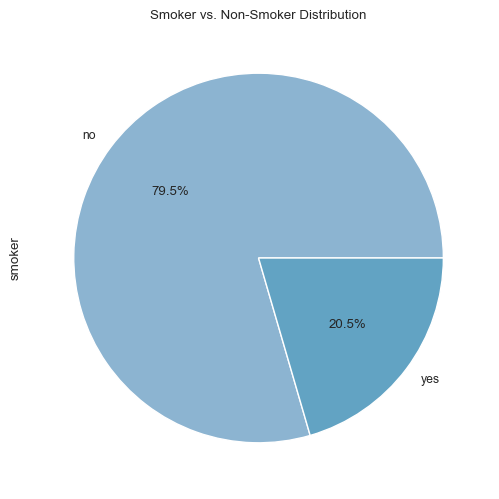

In [187]:
# Smoker vs. non-smoker distribution
plt.figure(figsize=(8, 6))
df['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Smoker vs. Non-Smoker Distribution')
plt.show()

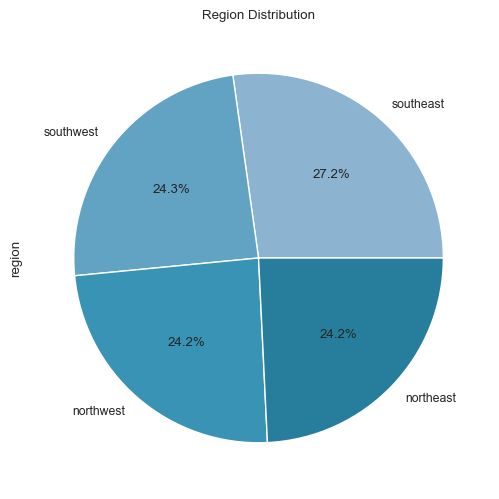

In [188]:
# Region distribution
plt.figure(figsize=(8, 6))
df['region'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Region Distribution')
plt.show()

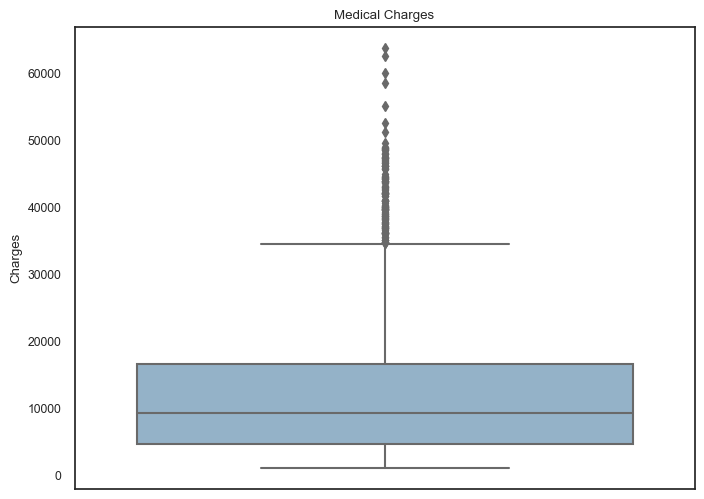

In [189]:
# Medical charges
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='charges')
plt.ylabel('Charges')
plt.title('Medical Charges')
plt.show()

### Bivariate Analysis

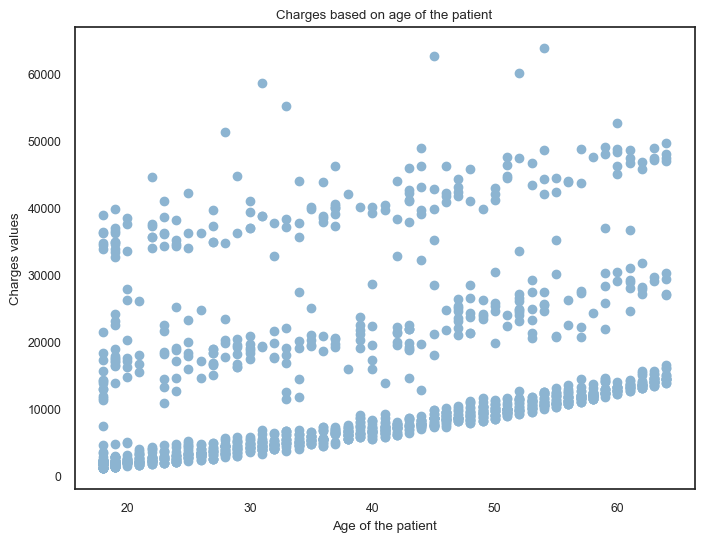

In [190]:
# Age vs Charges
plt.figure(figsize=(8, 6))
plt.scatter(df['age'],df['charges'])
plt.xlabel('Age of the patient')
plt.ylabel('Charges values')
plt.title('Charges based on age of the patient')
plt.show()

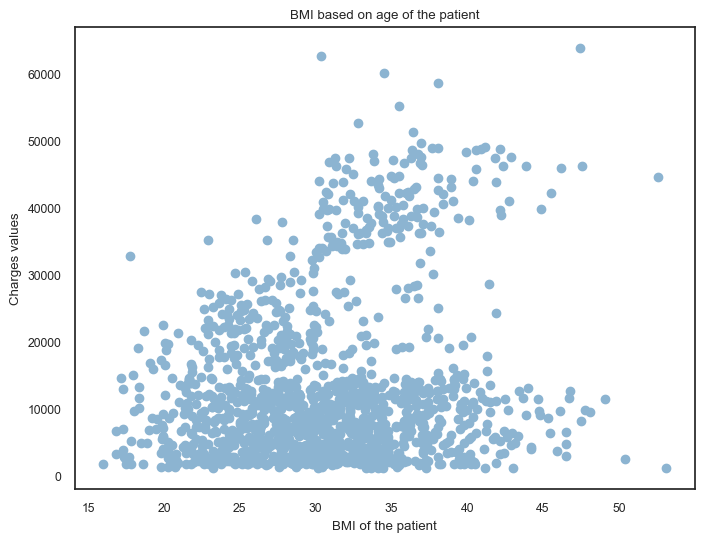

In [191]:
# BMI vs Charges
plt.figure(figsize=(8, 6))
plt.scatter(df['bmi'],df['charges'])
plt.xlabel('BMI of the patient')
plt.ylabel('Charges values')
plt.title('BMI based on age of the patient')
plt.show()

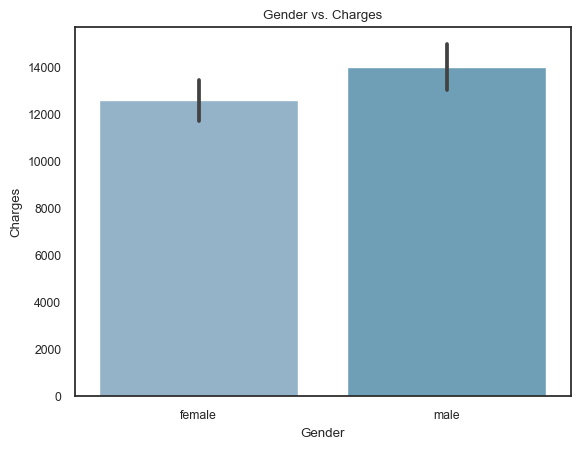

In [192]:
# Gender vs Charges
sns.barplot(data=df, x='sex', y='charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Gender vs. Charges')
plt.show()

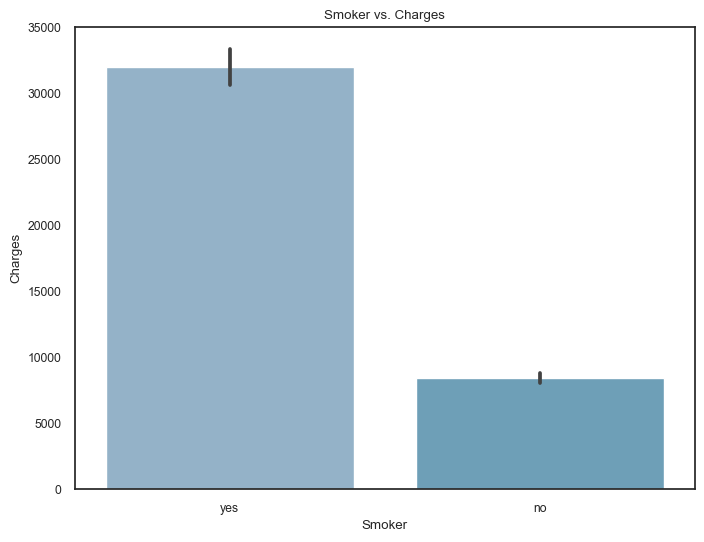

In [193]:
# Visualization : Grouped bar plot of smoker vs. charges
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Smoker vs. Charges')
plt.show()

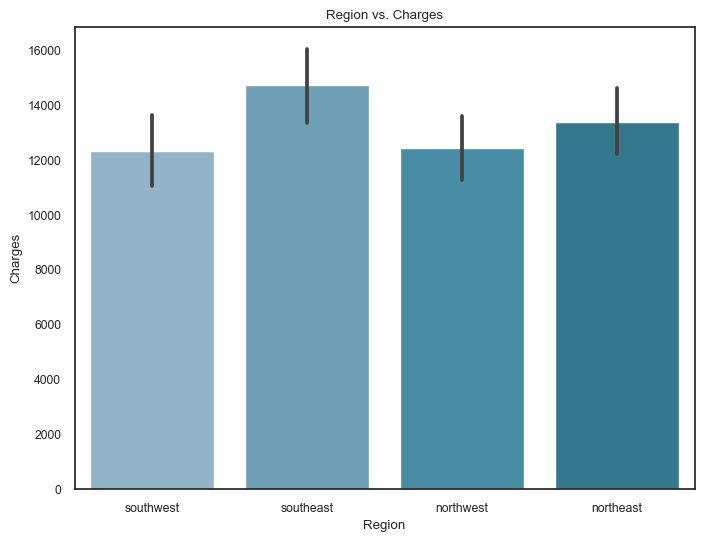

In [194]:
# Visualization : Stacked bar plot of region vs. charges
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='region', y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Region vs. Charges')
plt.show()

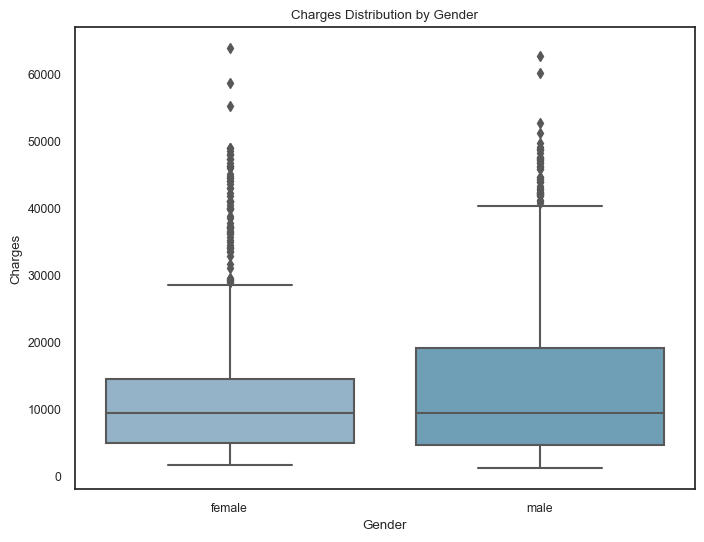

In [195]:
# Charges grouped by gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='sex', y='charges')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Charges Distribution by Gender')
plt.show()

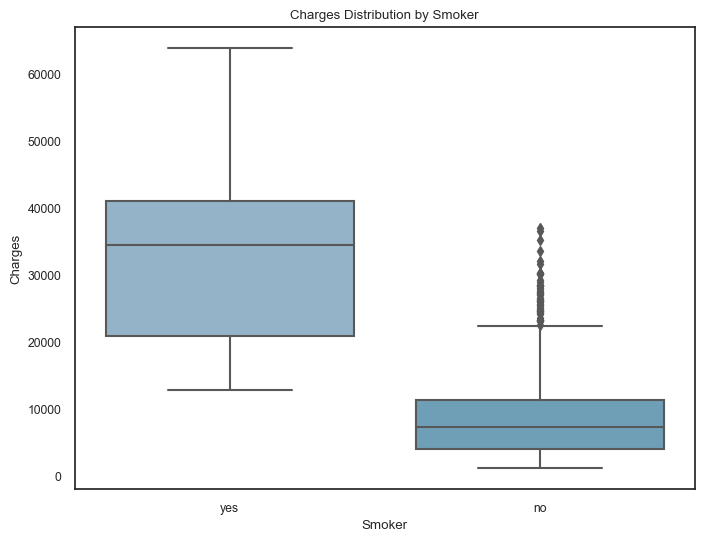

In [196]:
# Charges grouped by smoker vs. non-smoker
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='smoker', y='charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Charges Distribution by Smoker')
plt.show()

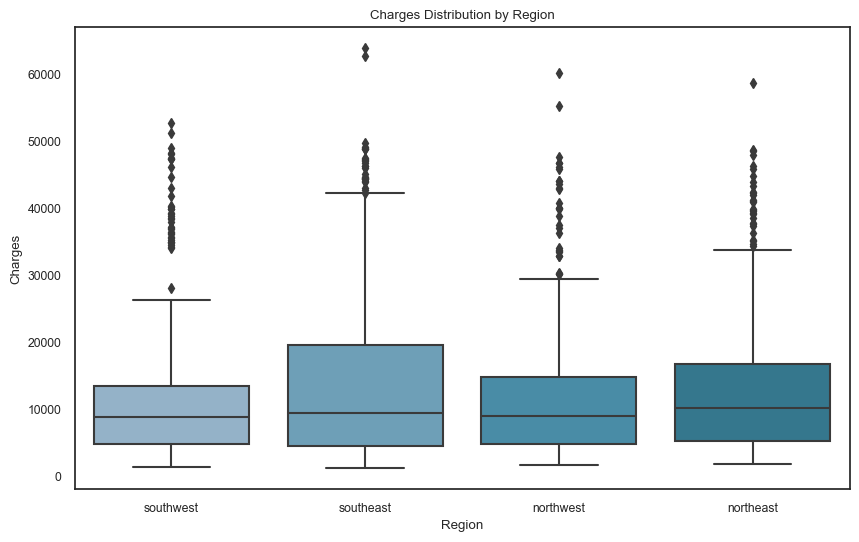

In [197]:
# Charges grouped by region
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Charges Distribution by Region')
plt.show()

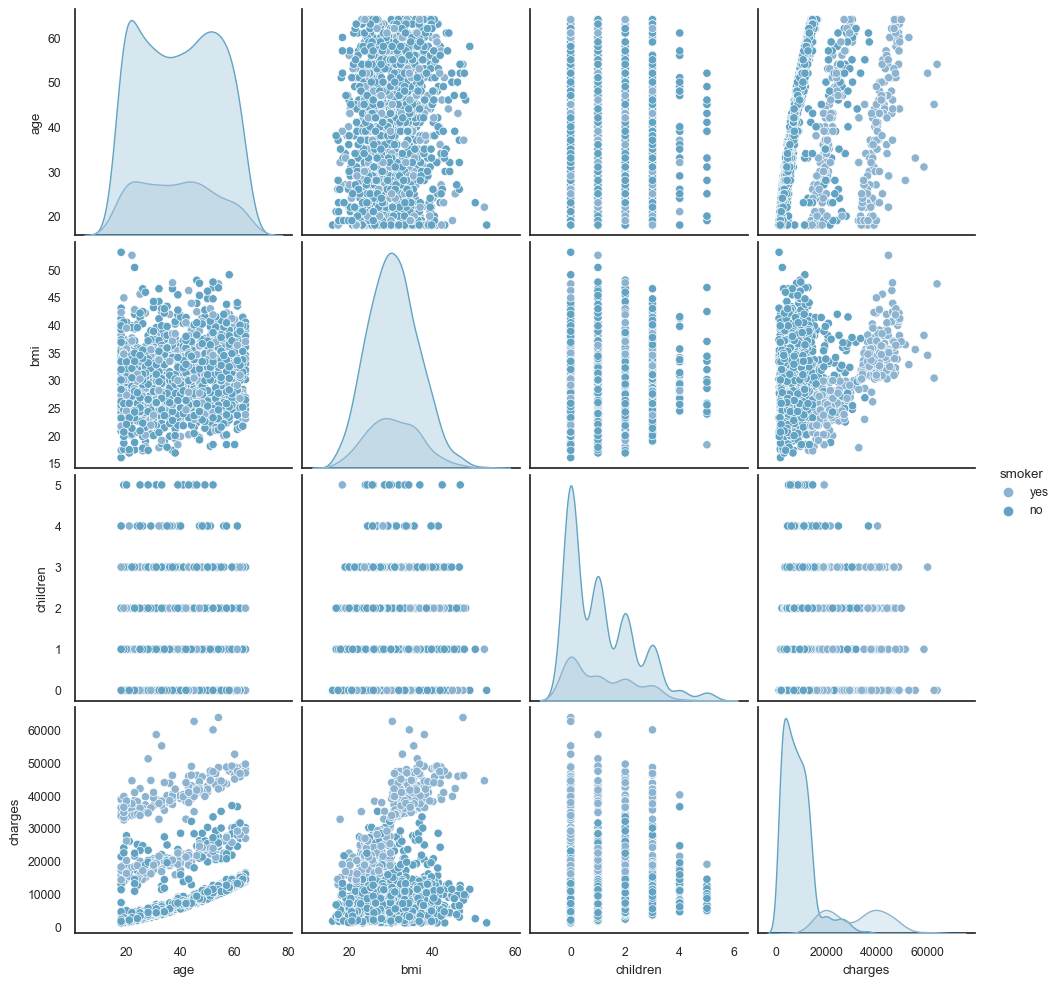

In [198]:
#  Pair plot with hue
sns.pairplot(df, hue='smoker')
plt.show()

### Preprocessing - Analysing categorical data and numerical values

In [199]:
data = df.copy()

In [200]:
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})

In [201]:
categorical_columns = ['region','sex']

In [202]:
numerical_columns = ['age','bmi','children','smoker','charges']

In [203]:
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

In [204]:
dummy_variables.head()

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,19,27.900,0,1,16884.92400,0,0,0,1,1,0
1,18,33.770,1,0,1725.55230,0,0,1,0,0,1
2,28,33.000,3,0,4449.46200,0,0,1,0,0,1
3,33,22.705,0,0,21984.47061,0,1,0,0,0,1
4,32,28.880,0,0,3866.85520,0,1,0,0,0,1


### Preprocessing: Scaler
In this case, numerical features are normalized and categorical features are one-hot encoded. The one-hot encoding is necessary for the machine learning to undestand the categorical data since it can only process numbers

In [205]:
scaler = StandardScaler()

In [206]:
# Let's scale the numerical columns
scaled_num = scaler.fit_transform(data[numerical_columns])

In [207]:
# Convert the scaled numerical columns into a df
scaled_numerical_df = pd.DataFrame(scaled_num, columns=numerical_columns)

In [208]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

In [209]:
# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

In [210]:
processed_df.head(20)

,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,age,bmi,children,smoker,charges
0,0.0,0.0,0.0,1.0,1.0,0.0,-1.440418,-0.453160,-0.909234,1.969660,0.297857
1,0.0,0.0,1.0,0.0,0.0,1.0,-1.511647,0.509422,-0.079442,-0.507702,-0.954381
2,0.0,0.0,1.0,0.0,0.0,1.0,-0.799350,0.383155,1.580143,-0.507702,-0.729373
3,0.0,1.0,0.0,0.0,0.0,1.0,-0.443201,-1.305052,-0.909234,-0.507702,0.719104
4,0.0,1.0,0.0,0.0,0.0,1.0,-0.514431,-0.292456,-0.909234,-0.507702,-0.777499
5,0.0,0.0,1.0,0.0,1.0,0.0,-0.585661,-0.807363,-0.909234,-0.507702,-0.786604
6,0.0,0.0,1.0,0.0,1.0,0.0,0.482785,0.455307,-0.079442,-0.507702,-0.416207
7,0.0,1.0,0.0,0.0,1.0,0.0,-0.158282,-0.479397,1.580143,-0.507702,-0.495432
8,1.0,0.0,0.0,0.0,0.0,1.0,-0.158282,-0.136672,0.750351,-0.507702,-0.567719
9,0.0,1.0,0.0,0.0,1.0,0.0,1.480002,-0.790965,-0.909234,-0.507702,1.292271


### Preprocessing: Correlation matrix

In [211]:
corr_mat = processed_df.corr()

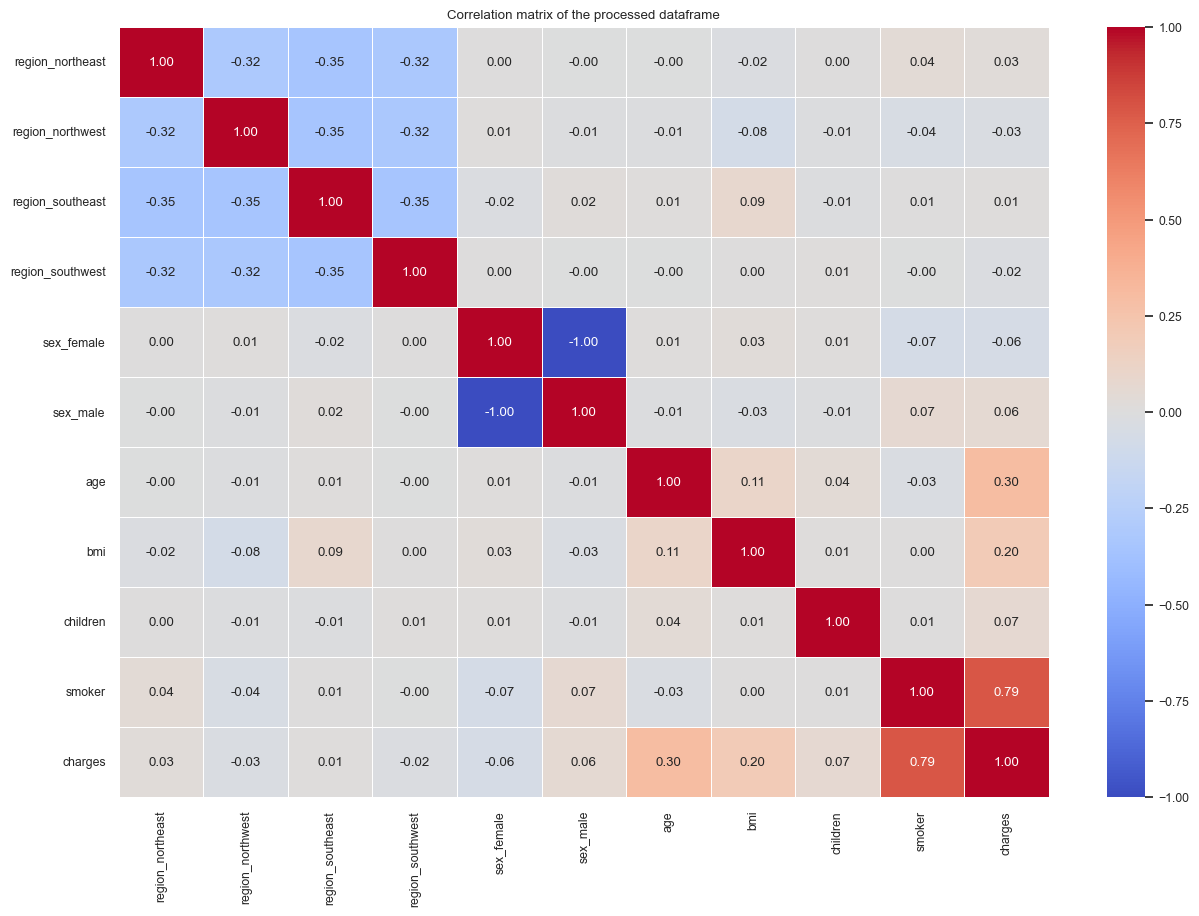

In [212]:
# Plotting the correlation matrix heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, cmap = 'coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation matrix of the processed dataframe")
plt.show()

We can see that there is a high correlation between smokers and charges per patients

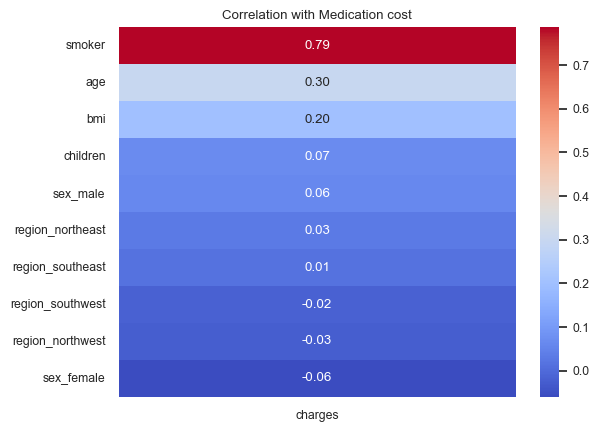

In [213]:
# Let's order the correlations by medication cost and target
corr = processed_df.corr()
target_corr = corr['charges'].drop('charges')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Medication cost')
plt.show()

Correlation does not imply causation. These correlations only indicate relationships between variables, not whether one variable causes changes in another.

### Building the model
Using a linear regression model

In [152]:
# Load data
df = pd.read_csv("insurance.csv")
df = df.drop_duplicates()

In [153]:
# Apply Label Encoding to the categorical columns
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

In [154]:
# Split into target and features
X = df.drop(columns='charges',axis = 1)
y = df['charges']

In [155]:
# Split into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [156]:
print(X.shape, X_train.shape, X_test.shape)

(1337, 6) (1069, 6) (268, 6)


In [157]:
print(y.shape, y_train.shape, y_test.shape)

(1337,) (1069,) (268,)


In [158]:
# Loading the Linear Regression model
regressor = LinearRegression()

In [159]:
# Fit the model
regressor.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [167]:
# Prediction on training data
training_data_prediction = regressor.predict(X_train)

In [168]:
# R squarred value
r2_train = r2_score(y_train, training_data_prediction)
print('R squarred value: ', r2_train)

R squarred value:  0.7586223702914746


In [169]:
# Prediction on training data
training_data_prediction_test = regressor.predict(X_test)

In [171]:
# R squarred value
r2_test = r2_score(y_test, training_data_prediction_test)
print('R squarred value: ', r2_test)

R squarred value:  0.7164204424900908
